In [37]:
# data visualization and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(stopwords.words('turkish'))

from textblob import TextBlob
import demoji
import re
import string

*********************** Loading the dataset *********************

In [14]:
df = pd.read_csv('./araskargo.csv')

In [15]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...
1,1,2022-09-30 19:46:59+00:00,Eminediyelim,@AtillaOzmumcu @TahsinLtan @vitaminlercom @ara...
2,2,2022-09-30 08:09:31+00:00,PelinZeyno,@araskargo Aldığınız malı çöpe atmak istiyorsa...
3,3,2022-09-29 21:47:23+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...
4,4,2022-09-29 21:47:03+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...


************************ Cleaning the Tweets *************************

In [38]:
def cleanTweet(tweet):
    tweet = tweet.lower()
    tweet = demoji.replace(tweet,"")
    tweet = re.sub('\n',' ',tweet)
    tweet = re.sub(r'@\w+|\#','',tweet)
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r"http\s+|www\S+|https\S+","",tweet,flags=re.MULTILINE) # remove link 
    filtered_words = [word for word in TextBlob(tweet).words if word not in stop_words]
    return " ".join(filtered_words)

In [39]:
df['cleanTweet'] = df['Tweet'].map(cleanTweet)

In [40]:
df['cleanTweet'][5]

'taşıdığı kargoyu çorbaya çeviren sorumsuz dan uzak durun sonrasında yaşananlar yüzünden araskargo rezalet yalan pişmanlık zarar demektir yi aynı kategoriye koydum mng zarar vermede araskargoyu aratmıyor biraz üzülmüşlermiş gelsinhayatbildiğigibi'

************** Creating the dtm(Document-Term-Matrix) **************

In [43]:
dataDoc = df['cleanTweet'].values.tolist()

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000)
tf = tf_vectorizer.fit_transform(dataDoc)

In [46]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

In [47]:
lsa_top=lsa_model.fit_transform(tf)

In [48]:
print(lsa_top)

[[ 1.19164107e+00  1.80971014e+00 -1.36003222e+00 ... -1.55268073e-03
  -1.97599084e-01 -1.06608907e+00]
 [ 7.23695840e-02  5.94235197e-02 -3.78366786e-02 ... -3.54477807e-02
   3.83813235e-02 -5.77829605e-02]
 [ 3.94204482e-01  5.98817694e-01 -4.51280308e-01 ...  7.50779246e-03
  -9.24963735e-02 -2.48055380e-01]
 ...
 [ 8.43044533e-02  4.58874890e-02 -6.07269351e-02 ... -3.50299697e-02
   1.69799854e-01 -7.59445378e-03]
 [ 7.60813797e-03  8.96846004e-03 -1.60937186e-03 ...  4.22512405e-03
   7.14289407e-03 -3.39519993e-02]
 [ 1.36941768e-02  1.88943953e-02 -4.33832197e-03 ... -5.48212080e-03
   3.87442472e-02 -2.65705569e-02]]


In [49]:
print(lsa_top.shape)

(11435, 10)


In [51]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 10000)
[[ 6.36143158e-05  5.67727866e-05  2.22826552e-04 ...  1.24909136e-05
   4.54154932e-05  3.69492639e-04]
 [ 1.19086115e-04  1.07468884e-04  2.45965953e-04 ...  2.58027520e-05
   3.76722042e-05  2.32492169e-04]
 [-1.25693747e-04  4.83557242e-05 -1.19869002e-05 ... -3.18802099e-05
  -5.81291179e-05  5.67696708e-04]
 ...
 [-6.34316720e-05  6.37895118e-05  3.09313123e-04 ... -9.03481969e-06
  -1.78126027e-04  5.09499717e-03]
 [ 2.52285036e-04  2.92658777e-04  5.30521867e-04 ... -5.47828439e-05
   1.87082387e-04 -8.05173867e-04]
 [ 2.30878733e-04 -6.69965857e-04  2.50458964e-04 ...  4.32342017e-04
   5.65735582e-06 -1.59002961e-03]]


In [53]:
# most important words for each topic
vocab = tf_vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
kargo bir uzak dan durun teslim taşıdığı çorbaya kargoyu zarar 

Topic 1: 
kargo bir aras teslim yok kadar var ben olmaz kargom 

Topic 2: 
bir kadar zarar olmaz bahar verdiğin tweet çiçekle atacağım seni 

Topic 3: 
diyor teslim bir gelmeden almasaydın taşırken kabul adreste şubeye geldik 

Topic 4: 
diyor teslim yalan zarar kabul geldik adreste şubeye etmedin bulunamadın 

Topic 5: 
kadar tweet verdiğin duyacak bin atacağım engellesen kargo olmayan engeli 

Topic 6: 
teslim kargomu kadar kargom kargoyu kargonun yok gün dedi bana 

Topic 7: 
kargonun sorumsuz sallayıp çorbaya içi herkes zarardır taşırken varsa beni 

Topic 8: 
yok kadar kargoyu gün evde var kargom bi geri kabul 

Topic 9: 
aras kargoyu dan herkes varsa uzak olmayan ödetene şler engeli 



In [54]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

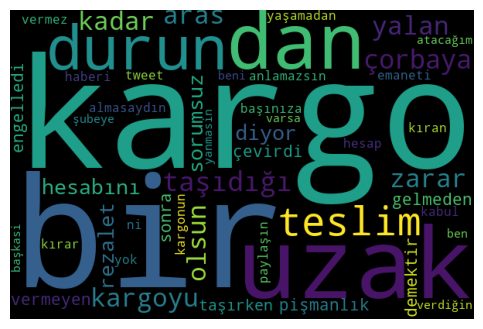

In [55]:
draw_word_cloud(0)